In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity 
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.sentiment.util import *
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
df = pd.read_csv('full.csv')

In [3]:
df.head()

,user,timestamp,commentText,y_label,likes,hasReplies,replies.commentText
0,Yasmin Sallam,1556813178506,"Ok so I’m muslim, so we only eat halal foods,w...",0,0,False,NaN
1,Tara Z,1556812818508,"As a vegan, I felt very uncomfortable with wat...",1,1,False,NaN
2,QueenEm,1556807658510,"In all honesty, vegan eating is actually more ...",0,0,False,NaN
3,Jenda Mh,1556804058512,"Enjoying my steak while watching this, remembe...",0,0,False,NaN
4,Cavalio Thorson,1556800458514,That girl is the type to try and make me feel ...,0,2,False,NaN


In [4]:
sent1 = df['commentText'][0]

In [5]:
tokes = word_tokenize(sent1)

In [6]:
n_instances= 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]

In [7]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

In [8]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

In [9]:
all_words_neg[:5]

['smart', 'and', 'alert', ',', 'thirteen']

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
sid.polarity_scores(sent1)

{'neg': 0.175, 'neu': 0.593, 'pos': 0.232, 'compound': 0.2933}

In [12]:
#instantiate a SentimentIntensity
#save polarity scores as dict
#create new neg column
def intenser_neg(words):
    ss = SentimentIntensityAnalyzer()
    a = ss.polarity_scores(words)
    return a['neg']

In [13]:
df['commentText'].iloc[:15].apply(lambda x: intenser_neg(x))

0     0.175
1     0.135
2     0.000
3     0.000
4     0.132
5     0.000
6     0.000
7     0.298
8     0.267
9     0.000
10    0.113
11    0.000
12    0.244
13    0.000
14    0.244
Name: commentText, dtype: float64

In [14]:
def intenser_pos(words):
    ss = SentimentIntensityAnalyzer()
    a = ss.polarity_scores(words)
    return a['pos']

In [15]:
df['commentText'].iloc[:20].apply(lambda x: intenser_pos(x))

0     0.232
1     0.267
2     0.166
3     0.379
4     0.000
5     0.583
6     0.672
7     0.000
8     0.079
9     0.184
10    0.000
11    0.000
12    0.000
13    0.237
14    0.000
15    0.281
16    0.220
17    0.000
18    0.079
19    0.000
Name: commentText, dtype: float64

In [16]:
sub=pd.read_csv('comments_train_full.csv')

In [17]:
sub.shape
sub.head()

,user,timestamp,commentText,vegan_y/n,likes,hasReplies,replies.commentText
0,Yasmin Sallam,1556813178506,"Ok so I’m muslim, so we only eat halal foods,w...",0.0,0,False,NaN
1,Tara Z,1556812818508,"As a vegan, I felt very uncomfortable with wat...",1.0,1,False,NaN
2,QueenEm,1556807658510,"In all honesty, vegan eating is actually more ...",0.0,0,False,NaN
3,Jenda Mh,1556804058512,"Enjoying my steak while watching this, remembe...",0.0,0,False,NaN
4,Cavalio Thorson,1556800458514,That girl is the type to try and make me feel ...,0.0,2,False,NaN


In [20]:
vegan = sub[sub['vegan_y/n']==1]
Meat = sub[sub['vegan_y/n']==0]

In [21]:
vec = CountVectorizer(stop_words='english')
vec.fit_transform(sub['commentText'])


<1570x3258 sparse matrix of type '<class 'numpy.int64'>'
	with 13385 stored elements in Compressed Sparse Row format>

In [63]:
vegan_words = vec.get_feature_names()

In [76]:
def count_vegan(words):
    count = 0
    words = word_tokenize(words)
    for word in words:
        if word in vegan_words:
            count += 1
    return count

In [86]:
# def count_non_veg(words):
#     count = 0
#     words = word_tokenize(words)
#     for word in words:
#         if word in vegan_words:
#             count += 1
#     return count

In [23]:
count_vegan(sub['commentText'][0])

NameError: name 'count_vegan' is not defined

In [89]:
count_non_veg(sub['commentText'][0])

0

In [80]:
sub['vegan_count'] = sub['commentText'].apply(lambda x: count_vegan(x))

In [ ]:
sub['vegan_count'] = sub['commentText'].apply(lambda x: count_vegan(x))

In [81]:
import numpy as np
np.unique(a)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 52, 56, 65,
       69, 82, 90])

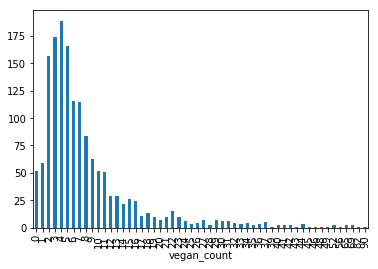

In [84]:
%matplotlib inline
sub.groupby('vegan_count')['vegan_count'].count().plot(kind = 'bar')

In [85]:
sub.nlargest(5, 'vegan_count')

,user,timestamp,commentText,vegan_y/n,likes,hasReplies,replies.commentText,vegan_count
542,twenty one pilots snatched my weave,1555000485098,4:56 i kind of agree with him because YOU are ...,0.0,0,False,NaN,90
468,Xiylomanic,1555605280605,"This comment has spoilers, just so you’re warn...",0.0,0,False,NaN,82
661,freeflying angel,1554222890570,One simplest question to vegans i got no probl...,0.0,0,False,NaN,69
662,freeflying angel,1554222890572,One simplest question to vegans i got no probl...,0.0,0,False,NaN,69
736,Murry Bubbles,1554222893601,Those vegans are not open minded especially th...,0.0,0,False,NaN,65


In [18]:
sub['commentText'][542]

'4:56 i kind of agree with him because YOU are stepping into the MOUNTAIN LION’S territory. for me it’d be like it’s your fault that maybe you got injured. i think you should try and protect yourself, even if it means injuring a huge animal in comparison to yourself. but when are you going to beat a mountain lion or other huge animal without a serious weapon like a gun or knife. if you tried to protect yourself and maybe it didn’t work out as well as you wanted, and you ended up getting injured by the animal, yes the animal did injure you, but it would be your fault for not coming prepared when you knew(if you did, might want to do research before you go do something like that) that it was a mountain lion’s territory. the animal is just trying to protect itself just like you are. it’s just like you in your neighborhood and you see a very unusual and maybe dangerous or violent animal(or it might be how they are portrayed) then you might harm it if they get to close or something along th

In [19]:
sub['commentText'][468]

'This comment has spoilers, just so you’re warned:\n\n\n\n\n\n\n\n\nOne of the things I have to say was how some people’s answers in this video to non-judgmental questions was unnecessarily judgmental and even a bit closed-minded to the circumstances of others. Like, “I’m willing to spend the extra dollar to eat healthy...,” kinda sets the undertone that the people who believe it’s expensive are cheap. That’s probably not what they were saying, but should someone pay more to be healthy then would be my question to that person’s response to the original inquiry. “It’s not expensive at all to eat Vegan..,” wasn’t the question at all, the statement in which to agree or disagree was, “It costs more to eat healthier.” That statement that person made to explain their view of the statement to me made me feel like the person was closed-minded to other diets, healthy foods, or techniques that are out there other than being vegan. Not everyone can be vegan, and that’s a fact, so if she didn’t kn